In [2]:
import json
import matplotlib.pyplot as plt

In [30]:
res_name_llama31 = "llama3.1_results.json"
res_name_llama32 = "llama3.2_results.json"
res_name_llava = "llava_results.json"
res_name_mistral = "mistral_results.json"
res_name_nemo = "nemo_results.json"
res_name_idefics2 = "idefics2_results.json"

llama31_results = json.load(open(res_name_llama31))
llama32_results = json.load(open(res_name_llama32))
nemo_results = json.load(open(res_name_nemo))
mistral_results = json.load(open(res_name_mistral))
llava_results = json.load(open(res_name_llava))
idefics2_results = json.load(open(res_name_idefics2))

In [4]:
def overall_acc(data, target="category"):
    overall_acc = 0
    for elem in data:
        if target == "category":
            if elem["gt_cat"] == elem["pred_cat"]:
                overall_acc += 1
        elif target == "concept":
            if elem["gt_concept"] == elem["pred_concept"]:
                overall_acc += 1
    return overall_acc / len(data)

In [5]:
from collections import defaultdict

def specific_acc(data, target="category"):
    specific_acc = defaultdict(list)
    for elem in data:
        if target == "category":
            gt = elem["gt_cat"]
            pred = elem["pred_cat"]
            res = 0 if pred != gt else 1
            specific_acc[gt].append(res)
    
        if target == "concept":
            gt = elem["gt_concept"]
            pred = elem["pred_concept"]
            res = 0 if pred != gt else 1
            specific_acc[gt].append(res)

    for k, v in specific_acc.items():
        specific_acc[k] = sum(v) / len(v)
    return specific_acc

In [31]:
acc_llama31 = specific_acc(llama31_results)
acc_llama32 = specific_acc(llama32_results)
acc_mistral = specific_acc(mistral_results)
acc_nemo = specific_acc(nemo_results)
acc_llava = specific_acc(llava_results)
acc_idefics2 = specific_acc(idefics2_results)

In [43]:
import pandas as pd

df_res = pd.DataFrame(acc_llama31, index=["llama3.1"])
df_res = pd.concat([df_res, pd.DataFrame(acc_llama32, index=["llama3.2"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_mistral, index=["mistral"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_llava, index=["llava"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_nemo, index=["nemo"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_idefics2, index=["idefics2"])])

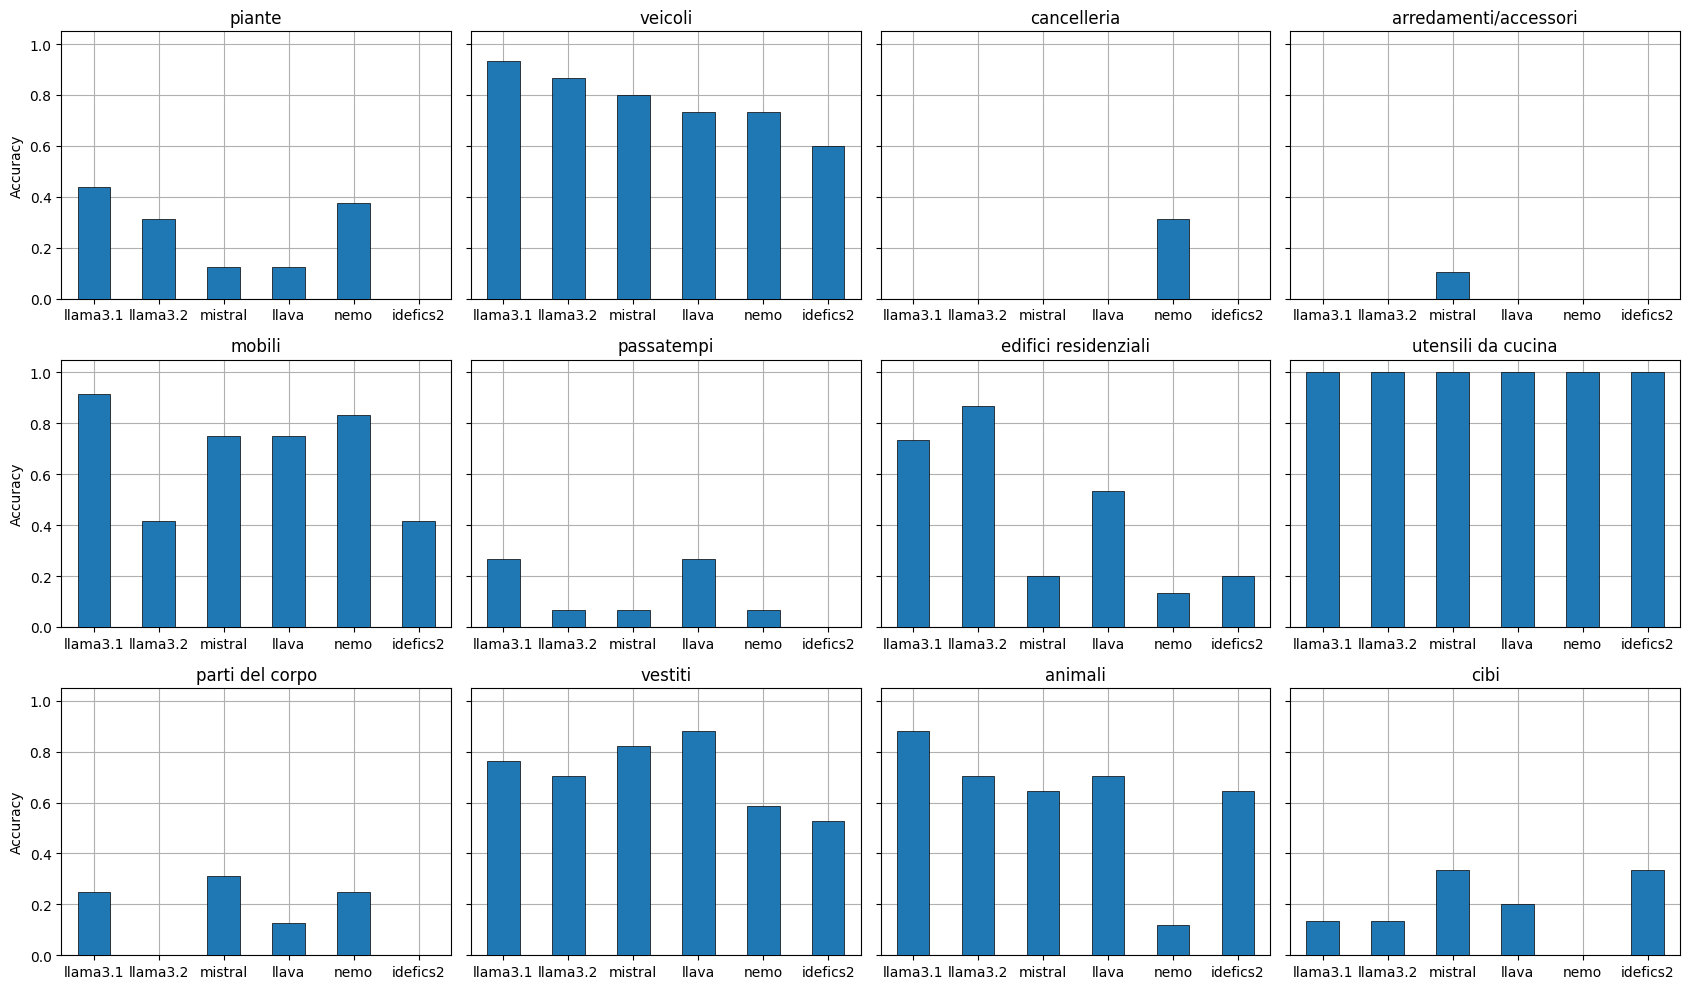

In [44]:
plot_config = {
    "edgecolor": "black",
    "linewidth": 0.5,
    "rot": 0
}

fig, axs = plt.subplots(3, 4, figsize=(17, 10), sharey=True, layout="tight")
axs = axs.ravel()

concepts = sorted(list(acc_llama31.keys()))

for i, concept in enumerate(df_res.columns):
    axs[i].set_title(concept)
    df_res[concept].plot.bar(**plot_config, zorder=3, ax=axs[i])
    axs[i].grid(True, zorder=0)
    axs[i].set_ylabel("Accuracy")

# df_res.piante.plot.bar(**plot_config, zorder=3, ax=axs[0])

fig.show()

In [45]:
specific_acc(llama32_results, target="category")

defaultdict(list,
            {'piante': 0.3125,
             'veicoli': 0.8666666666666667,
             'cancelleria': 0.0,
             'arredamenti/accessori': 0.0,
             'mobili': 0.4166666666666667,
             'passatempi': 0.06666666666666667,
             'edifici residenziali': 0.8666666666666667,
             'utensili da cucina': 1.0,
             'parti del corpo': 0.0,
             'vestiti': 0.7058823529411765,
             'animali': 0.7058823529411765,
             'cibi': 0.13333333333333333})

In [47]:
specific_acc(mistral_results)

defaultdict(list,
            {'piante': 0.125,
             'veicoli': 0.8,
             'cancelleria': 0.0,
             'arredamenti/accessori': 0.10526315789473684,
             'mobili': 0.75,
             'passatempi': 0.06666666666666667,
             'edifici residenziali': 0.2,
             'utensili da cucina': 1.0,
             'parti del corpo': 0.3125,
             'vestiti': 0.8235294117647058,
             'animali': 0.6470588235294118,
             'cibi': 0.3333333333333333})

In [48]:
specific_acc(nemo_results)

defaultdict(list,
            {'piante': 0.375,
             'veicoli': 0.7333333333333333,
             'cancelleria': 0.3125,
             'arredamenti/accessori': 0.0,
             'mobili': 0.8333333333333334,
             'passatempi': 0.06666666666666667,
             'edifici residenziali': 0.13333333333333333,
             'utensili da cucina': 1.0,
             'parti del corpo': 0.25,
             'vestiti': 0.5882352941176471,
             'animali': 0.11764705882352941,
             'cibi': 0.0})

In [49]:
specific_acc(llava_results)

defaultdict(list,
            {'piante': 0.125,
             'veicoli': 0.7333333333333333,
             'cancelleria': 0.0,
             'arredamenti/accessori': 0.0,
             'mobili': 0.75,
             'passatempi': 0.26666666666666666,
             'edifici residenziali': 0.5333333333333333,
             'utensili da cucina': 1.0,
             'parti del corpo': 0.125,
             'vestiti': 0.8823529411764706,
             'animali': 0.7058823529411765,
             'cibi': 0.2})